# MIDTERM PROJECT

In [1]:
# ============================================================
# 1. IMPORTS
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to make sure the plots are shown in the notebook
%matplotlib inline 

import re
from unidecode import unidecode
from IPython.display import display

import os
import wget
import zipfile

from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import joblib

In [7]:
# ============================================================
# 2. DOWNLOAD DATA
# ============================================================

url = "https://archive.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip"
folder = "07_midterm_project/data/"

file = os.path.join(folder, "predict+students+dropout+and+academic+success.zip")

# Crear la carpeta si no existe (opcional)
# os.makedirs(os.path.dirname(ruta_archivo), exist_ok=True)

if os.path.exists(file):
    print("File already downloaded.")
else:
    try:
        print("Downloading file...")
        wget.download(url, file)
        print("Download done.")
    except:
        print("Error downloading file.")


# if os.path.exists(ruta_archivo):
#     print("El archivo ya está descargado.")
# else:
#     print("Descargando archivo...")
#     r = requests.get(url)
#     r.raise_for_status()  # opcional: lanza error si la descarga falla
#     with open(ruta_archivo, "wb") as f:
#         f.write(r.content)
#     print("Descarga completada.")


Download done.


In [8]:
# ============================================================
# 3. UNZIP DATA
# ============================================================

# zip_path = '07_midterm_project/data/predict+students+dropout+and+academic+success.zip'
folder_destiny = '07_midterm_project/data/'

try:
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall(folder_destiny)

    print(f"File unzip in: {folder_destiny}")
except:
    print("Error unzipping.")

File unzip in: 07_midterm_project/data/


In [2]:
# ============================================================
# 4. LOAD DATA
# ============================================================

file = '07_midterm_project/data/data.csv'

df = pd.read_csv(file, delimiter=';')

# Preview
print("Shape:", df.shape)
df.head()

Shape: (4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# ============================================================
# 3. INITIAL CLEANING
# ============================================================
def to_snake_case(name):
    # Special characters
    name = unidecode(name)
    # Lowercase
    name = name.lower()
    # Replace non alphanumeric by _
    name = re.sub(r'[^a-z0-9]+', '_', name)
    # Delete initial and ending _
    name = name.strip('_')
    return name

def standardize_columns(df):
    df = df.copy()
    df.columns = [to_snake_case(col) for col in df.columns]
    return df

In [4]:
df = standardize_columns(df)
print(df.columns)

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime_evening_attendance', 'previous_qualification',
       'previous_qualification_grade', 'nacionality', 'mother_s_qualification',
       'father_s_qualification', 'mother_s_occupation', 'father_s_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem

In [5]:
# Check missing values
df_null = df.isnull().sum()

df_null.sort_values(ascending=False)


marital_status                                  0
application_mode                                0
application_order                               0
course                                          0
daytime_evening_attendance                      0
previous_qualification                          0
previous_qualification_grade                    0
nacionality                                     0
mother_s_qualification                          0
father_s_qualification                          0
mother_s_occupation                             0
father_s_occupation                             0
admission_grade                                 0
displaced                                       0
educational_special_needs                       0
debtor                                          0
tuition_fees_up_to_date                         0
gender                                          0
scholarship_holder                              0
age_at_enrollment                               0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   marital_status                                4424 non-null   int64  
 1   application_mode                              4424 non-null   int64  
 2   application_order                             4424 non-null   int64  
 3   course                                        4424 non-null   int64  
 4   daytime_evening_attendance                    4424 non-null   int64  
 5   previous_qualification                        4424 non-null   int64  
 6   previous_qualification_grade                  4424 non-null   float64
 7   nacionality                                   4424 non-null   int64  
 8   mother_s_qualification                        4424 non-null   int64  
 9   father_s_qualification                        4424 non-null   i

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:10])
    print(df[col].nunique())
    print()

marital_status
[1 2 4 3 5 6]
6

application_mode
[17 15  1 39 18 53 44 51 43  7]
18

application_order
[5 1 2 4 3 6 9 0]
8

course
[ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853]
17

daytime_evening_attendance
[1 0]
2

previous_qualification
[ 1 19 42 39 10  3 40  2  4 12]
17

previous_qualification_grade
[122.  160.  100.  133.1 142.  119.  137.  138.  139.  136. ]
101

nacionality
[  1  62   6  41  26 103  13  25  21 101]
21

mother_s_qualification
[19  1 37 38  3  4 42  2 34 12]
29

father_s_qualification
[12  3 37 38  1 19  5  4 34  2]
34

mother_s_occupation
[  5   3   9   7   4   1 125   0   6   2]
32

father_s_occupation
[  9   3   7  10   5   8   4   1   2 124]
46

admission_grade
[127.3 142.5 124.8 119.6 141.5 114.8 128.4 113.1 129.3 123. ]
620

displaced
[1 0]
2

educational_special_needs
[0 1]
2

debtor
[0 1]
2

tuition_fees_up_to_date
[1 0]
2

gender
[1 0]
2

scholarship_holder
[0 1]
2

age_at_enrollment
[20 19 45 50 18 22 21 34 37 43]
46

international
[0 1]
2

curricu

In [8]:
# Mapping values (from the dataset page: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)
marital_status = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto_union',
    6: 'legally_separated'
}
for values in marital_status:
    marital_status[values] = to_snake_case(marital_status[values])

application_mode = {
    1: '1st_phase_general_contingent',
    2: 'Ordinance No. 612/93',
    5: '1st_phase_special_contingent_azores',
    7: 'holders_of_other_higher_courses',
    10: 'international_student',
    15: 'International student (bachelor)',
    16: '1st_phase_special_contingent_madeira',
    17: '2nd_phase_general_contingent',
    18: '3rd_phase_general_contingent',
    26: 'different_plan',
    27: 'other_institution',
    39: 'over_23_years_old',
    42: 'transfer',
    43: 'change_of_course',
    44: 'technological_specialization_diploma_holders ',
    51: 'change_of_institution_course',
    53: 'short_cycle_diploma_holders',
    57: 'change_of_institution_course_international'
}
for values in application_mode:
    application_mode[values] = to_snake_case(application_mode[values])

course = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene ',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance'
}
for values in course:
    course[values] = to_snake_case(course[values])

daytime_evening_attendance = {
    1: 'daytime',
    0: 'evening'
}
for values in daytime_evening_attendance:
    daytime_evening_attendance[values] = to_snake_case(daytime_evening_attendance[values])


previous_qualification = {
    1: 'Secondary education',
    2: 'Higher education - bachelors degree',
    3: 'Higher education - degree',
    4: 'Higher education - masters' ,
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education ',
    9: '12th year of schooling - not completed ',
    10: '11th year of schooling - not completed ',
    12: 'Other - 11th year of schooling ',
    14: '10th year of schooling ',
    15: '10th year of schooling - not completed ',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv. ',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv. ',
    39: 'Technological specialization course ',
    40: 'Higher education - degree (1st cycle) ',
    42: 'Professional higher technical course ',
    43: 'Higher education - master (2nd cycle)'
}
for values in previous_qualification:
    previous_qualification[values] = to_snake_case(previous_qualification[values])

nacionality = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian', 
    13: 'Dutch', 
    14: 'English', 
    17: 'Lithuanian',
    21: 'Angolan', 
    22: 'Cape Verdean', 
    24: 'Guinean', 
    25: 'Mozambican', 
    26: 'Santomean', 
    32: 'Turkish', 
    41: 'Brazilian', 
    62: 'Romanian', 
    100: 'Moldova (Republic of)', 
    101: 'Mexican', 
    103: 'Ukrainian', 
    105: 'Russian', 
    108: 'Cuban', 
    109: 'Colombian'
}
for values in nacionality:
    nacionality[values] = to_snake_case(nacionality[values])

mother_s_qualification = {
    1: 'Secondary Education 12th Year of Schooling or Eq. ',
    2: 'Higher Education Bachelors Degree ',
    3: 'Higher Education Degree ',
    4: 'Higher Education Masters ',
    5: 'Higher Education Doctorate ',
    6: 'Frequency of Higher Education ',
    9: '12th Year of Schooling Not Completed ',
    10: '11th Year of Schooling Not Completed ',
    11: '7th Year (Old) ',
    12: 'Other 11th Year of Schooling ',
    14: '10th Year of Schooling ',
    18: 'General commerce course ',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. ',
    22: 'Technical-professional course ',
    26: '7th year of schooling ',
    27: '2nd cycle of the general high school course ',
    29: '9th Year of Schooling Not Completed ',
    30: '8th year of schooling ',
    34: 'Unknown ',
    35: 'Cant read or write ',
    36: 'Can read without having a 4th year of schooling ',
    37: 'Basic education 1st cycle (4th/5th year) or equiv. ',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. ',
    39: 'Technological specialization course ',
    40: 'Higher education degree (1st cycle) ',
    41: 'Specialized higher studies course ',
    42: 'Professional higher technical course ',
    43: 'Higher Education Master (2nd cycle) ',
    44: 'Higher Education Doctorate (3rd cycle)'
}
for values in mother_s_qualification:
    mother_s_qualification[values] = to_snake_case(mother_s_qualification[values])

father_s_qualification = {
    1: 'Secondary Education 12th Year of Schooling or Eq. ',
    2: 'Higher Education Bachelors Degree ',
    3: 'Higher Education Degree ',
    4: 'Higher Education Masters ',
    5: 'Higher Education Doctorate ',
    6: 'Frequency of Higher Education ',
    9: '12th Year of Schooling Not Completed ',
    10: '11th Year of Schooling Not Completed ',
    11: '7th Year (Old) ',
    12: 'Other 11th Year of Schooling ',
    13: '2nd year complementary high school course ',
    14: '10th Year of Schooling ',
    18: 'General commerce course ',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. ',
    20: 'Complementary High School Course ',
    22: 'Technical-professional course ',
    25: 'Complementary High School Course not concluded ',
    26: '7th year of schooling ',
    27: '2nd cycle of the general high school course ',
    29: '9th Year of Schooling Not Completed ',
    30: '8th year of schooling ',
    31: 'General Course of Administration and Commerce ',
    33: 'Supplementary Accounting and Administration ',
    34: 'Unknown ',
    35: 'Cant read or write ',
    36: 'Can read without having a 4th year of schooling ',
    37: 'Basic education 1st cycle (4th/5th year) or equiv. ',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. ',
    39: 'Technological specialization course ',
    40: 'Higher education degree (1st cycle) ',
    41: 'Specialized higher studies course ',
    42: 'Professional higher technical course ',
    43: 'Higher Education Master (2nd cycle) ',
    44: 'Higher Education Doctorate (3rd cycle)',
}
for values in father_s_qualification:
    father_s_qualification[values] = to_snake_case(father_s_qualification[values])

mother_s_occupation = {
    0: 'Student ',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers ',
    2: 'Specialists in Intellectual and Scientific Activities ',
    3: 'Intermediate Level Technicians and Professions ',
    4: 'Administrative staff ',
    5: 'Personal Services, Security and Safety Workers and Sellers ',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry ',
    7: 'Skilled Workers in Industry, Construction and Craftsmen ',
    8: 'Installation and Machine Operators and Assembly Workers ',
    9: 'Unskilled Workers ',
    10: 'Armed Forces Professions ',
    90: 'Other Situation ',
    99: '(blank) ',
    122: 'Health professionals ',
    123: 'teachers ',
    125: 'Specialists in information and communication technologies (ICT) ',
    131: 'Intermediate level science and engineering technicians and professions ',
    132: 'Technicians and professionals, of intermediate level of health ',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services ',
    141: 'Office workers, secretaries in general and data processing operators ',
    143: 'Data, accounting, statistical, financial services and registry-related operators ',
    144: 'Other administrative support staff ',
    151: 'personal service workers ',
    152: 'sellers ',
    153: 'Personal care workers and the like ',
    171: 'Skilled construction workers and the like, except electricians ',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like ',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts ',
    191: 'cleaning workers ',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry ',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport ',
    194: 'Meal preparation assistants'
}
for values in mother_s_occupation:
    mother_s_occupation[values] = to_snake_case(mother_s_occupation[values])

father_s_occupation = {
    0: 'Student ',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers ',
    2: 'Specialists in Intellectual and Scientific Activities ',
    3: 'Intermediate Level Technicians and Professions ',
    4: 'Administrative staff ',
    5: 'Personal Services, Security and Safety Workers and Sellers ',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry ',
    7: 'Skilled Workers in Industry, Construction and Craftsmen ',
    8: 'Installation and Machine Operators and Assembly Workers ',
    9: 'Unskilled Workers ',
    10: 'Armed Forces Professions ',
    90: 'Other Situation ',
    99: '(blank) ',
    101: 'Armed Forces Officers ',
    102: 'Armed Forces Sergeants ',
    103: 'Other Armed Forces personnel ',
    112: 'Directors of administrative and commercial services ',
    114: 'Hotel, catering, trade and other services directors ',
    121: 'Specialists in the physical sciences, mathematics, engineering and related techniques ',
    122: 'Health professionals ',
    123: 'teachers ',
    124: 'Specialists in finance, accounting, administrative organization, public and commercial relations ',
    131: 'Intermediate level science and engineering technicians and professions ',
    132: 'Technicians and professionals, of intermediate level of health ',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services ',
    135: 'Information and communication technology technicians ',
    141: 'Office workers, secretaries in general and data processing operators ',
    143: 'Data, accounting, statistical, financial services and registry-related operators ',
    144: 'Other administrative support staff ',
    151: 'personal service workers ',
    152: 'sellers ',
    153: 'Personal care workers and the like ',
    154: 'Protection and security services personnel ',
    161: 'Market-oriented farmers and skilled agricultural and animal production workers ',
    163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence ',
    171: 'Skilled construction workers and the like, except electricians ',
    172: 'Skilled workers in metallurgy, metalworking and similar ',
    174: 'Skilled workers in electricity and electronics ',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts ',
    181: 'Fixed plant and machine operators ',
    182: 'assembly workers ',
    183: 'Vehicle drivers and mobile equipment operators ',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry ',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport ',
    194: 'Meal preparation assistants ',
    195: 'Street vendors (except food) and street service providers'
}
for values in father_s_occupation:
    father_s_occupation[values] = to_snake_case(father_s_occupation[values])

yes_no = {
    1: 'yes',
    0: 'no'
}

gender = {
    1: 'male',
    0: 'female'
}


In [9]:
df.marital_status = df.marital_status.map(marital_status)
df.application_mode = df.application_mode.map(application_mode)
df.course = df.course.map(course)
df.daytime_evening_attendance = df.daytime_evening_attendance.map(daytime_evening_attendance)
df.previous_qualification = df.previous_qualification.map(previous_qualification)
df.nacionality = df.nacionality.map(nacionality)
df.mother_s_qualification = df.mother_s_qualification.map(mother_s_qualification)
df.father_s_qualification = df.father_s_qualification.map(father_s_qualification)
df.mother_s_occupation = df.mother_s_occupation.map(mother_s_occupation)
df.father_s_occupation = df.father_s_occupation.map(father_s_occupation)

df.displaced = df.displaced.map(yes_no)
df.educational_special_needs = df.educational_special_needs.map(yes_no)
df.debtor = df.debtor.map(yes_no)
df.tuition_fees_up_to_date = df.tuition_fees_up_to_date.map(yes_no)
df.scholarship_holder = df.scholarship_holder.map(yes_no)
df.international = df.international.map(yes_no)
df.gender = df.gender.map(gender)

In [10]:
binary_features = ['displaced','educational_special_needs','debtor','tuition_fees_up_to_date','gender',
                   'scholarship_holder','international']
numerical_features = ['application_order','previous_qualification_grade','admission_grade',
                      'age_at_enrollment','curricular_units_1st_sem_credited','curricular_units_1st_sem_enrolled',
                      'curricular_units_1st_sem_evaluations','curricular_units_1st_sem_approved','curricular_units_1st_sem_grade',
                      'curricular_units_1st_sem_without_evaluations','curricular_units_2nd_sem_credited',
                      'curricular_units_2nd_sem_enrolled','curricular_units_2nd_sem_evaluations','curricular_units_2nd_sem_approved',
                      'curricular_units_2nd_sem_grade','curricular_units_2nd_sem_without_evaluations','unemployment_rate','inflation_rate','gdp']
categotical_features = ['marital_status','application_mode','course','daytime_evening_attendance','previous_qualification',
                        'nacionality','mother_s_qualification','father_s_qualification','mother_s_occupation','father_s_occupation']

In [11]:
# Quick target inspection
df['target'].value_counts()

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

The original study aimed to determine whether a student, at the end of the normal duration of the course, had graduated, remained enrolled, or had dropped out. To simplify this project, we will reduce the study to a binary outcome: whether the student has dropped out (True) or not. In this way, we will combine Graduated and Enrolled as False.

In [12]:
df.target = (df.target == 'Dropout').astype(int)

In [13]:
df.head()

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nacionality,mother_s_qualification,father_s_qualification,...,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,target
0,single,2nd_phase_general_contingent,5,animation_and_multimedia_design,daytime,secondary_education,122.0,portuguese,basic_education_3rd_cycle_9th_10th_11th_year_o...,other_11th_year_of_schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,single,international_student_bachelor,1,tourism,daytime,secondary_education,160.0,portuguese,secondary_education_12th_year_of_schooling_or_eq,higher_education_degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,single,1st_phase_general_contingent,5,communication_design,daytime,secondary_education,122.0,portuguese,basic_education_1st_cycle_4th_5th_year_or_equiv,basic_education_1st_cycle_4th_5th_year_or_equiv,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,single,2nd_phase_general_contingent,2,journalism_and_communication,daytime,secondary_education,122.0,portuguese,basic_education_2nd_cycle_6th_7th_8th_year_or_...,basic_education_1st_cycle_4th_5th_year_or_equiv,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,married,over_23_years_old,1,social_service_evening_attendance,evening,secondary_education,100.0,portuguese,basic_education_1st_cycle_4th_5th_year_or_equiv,basic_education_2nd_cycle_6th_7th_8th_year_or_...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


## Exploratory data analysis (EDA)

In [43]:
# Distribution of target
global_target = df.target.mean()
global_target

np.float64(0.3212025316455696)

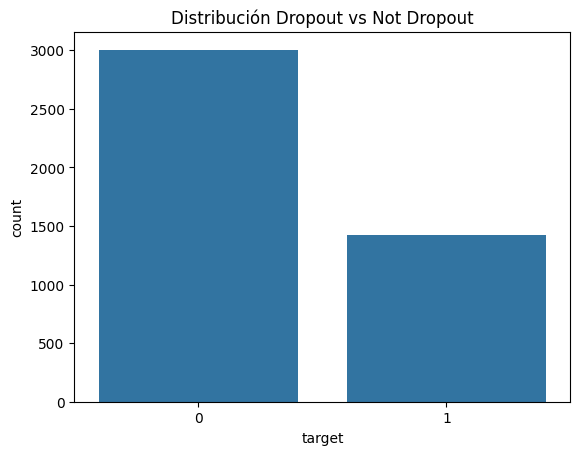

In [ ]:
df.target.value_counts(normalize=True)
sns.countplot(x='target', data=df)
plt.title('Distribución Dropout vs Not Dropout')
plt.show()

In [51]:
# resumen general
print(df.shape)
df.info()
df.describe(include='all').T
# porcentaje missing por columna
(df.isnull().mean() * 100).sort_values(ascending=False).head(20)

(4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   marital_status                                4424 non-null   object 
 1   application_mode                              4424 non-null   object 
 2   application_order                             4424 non-null   int64  
 3   course                                        4424 non-null   object 
 4   daytime_evening_attendance                    4424 non-null   object 
 5   previous_qualification                        4424 non-null   object 
 6   previous_qualification_grade                  4424 non-null   float64
 7   nacionality                                   4424 non-null   object 
 8   mother_s_qualification                        4424 non-null   object 
 9   father_s_qualification                        4424 n

marital_status                  0.0
application_mode                0.0
application_order               0.0
course                          0.0
daytime_evening_attendance      0.0
previous_qualification          0.0
previous_qualification_grade    0.0
nacionality                     0.0
mother_s_qualification          0.0
father_s_qualification          0.0
mother_s_occupation             0.0
father_s_occupation             0.0
admission_grade                 0.0
displaced                       0.0
educational_special_needs       0.0
debtor                          0.0
tuition_fees_up_to_date         0.0
gender                          0.0
scholarship_holder              0.0
age_at_enrollment               0.0
dtype: float64

In [ ]:
df[numerical_features].describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
application_order,4424.0,1.73,1.31,0.00,1.00,1.00,2.00,9.00
previous_qualification_grade,4424.0,132.61,13.19,95.00,125.00,133.10,140.00,190.00
admission_grade,4424.0,126.98,14.48,95.00,117.90,126.10,134.80,190.00
age_at_enrollment,4424.0,23.27,7.59,17.00,19.00,20.00,25.00,70.00
curricular_units_1st_sem_credited,4424.0,0.71,2.36,0.00,0.00,0.00,0.00,20.00
curricular_units_1st_sem_enrolled,4424.0,6.27,2.48,0.00,5.00,6.00,7.00,26.00
curricular_units_1st_sem_evaluations,4424.0,8.30,4.18,0.00,6.00,8.00,10.00,45.00
curricular_units_1st_sem_approved,4424.0,4.71,3.09,0.00,3.00,5.00,6.00,26.00
curricular_units_1st_sem_grade,4424.0,10.64,4.84,0.00,11.00,12.29,13.40,18.88
curricular_units_1st_sem_without_evaluations,4424.0,0.14,0.69,0.00,0.00,0.00,0.00,12.00


<Axes: >

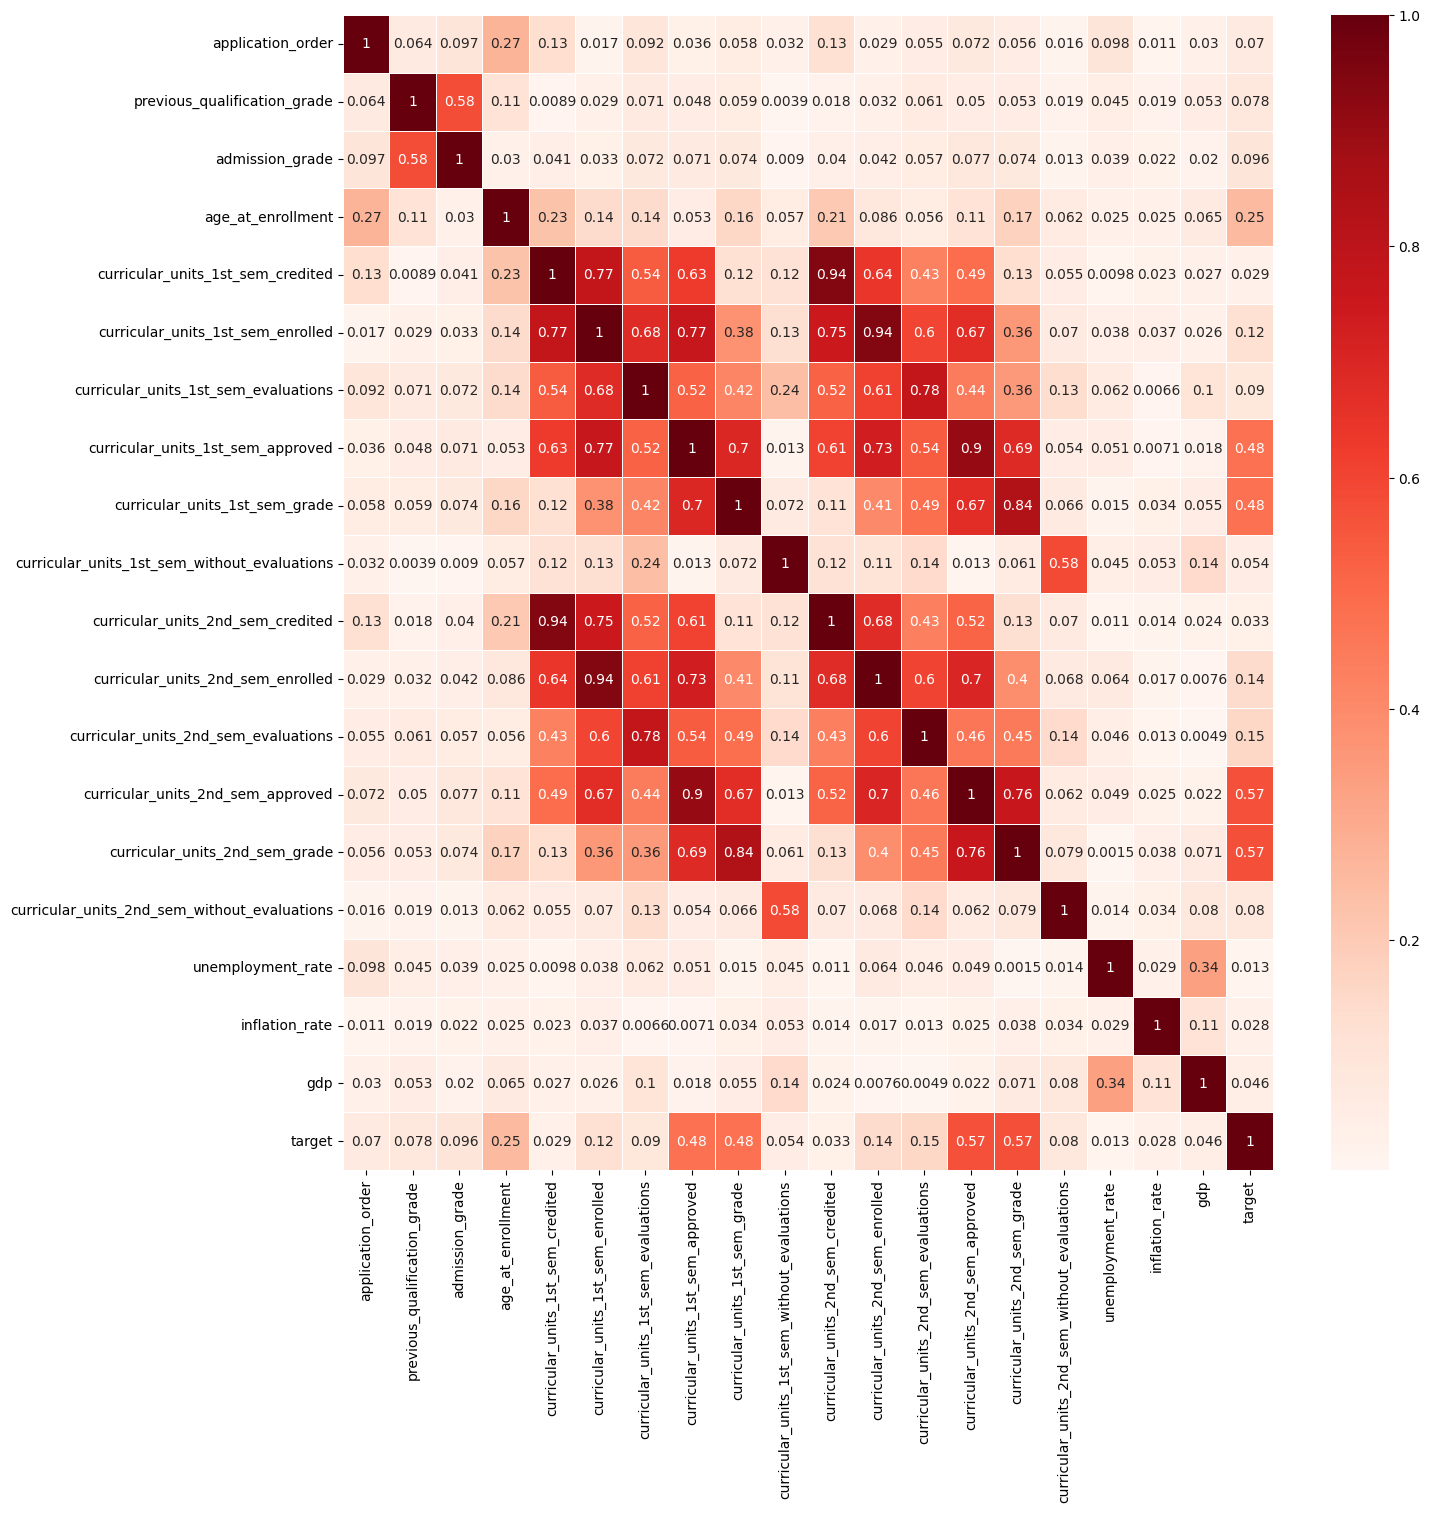

In [76]:

numerical_features_target = ['application_order','previous_qualification_grade','admission_grade',
                      'age_at_enrollment','curricular_units_1st_sem_credited','curricular_units_1st_sem_enrolled',
                      'curricular_units_1st_sem_evaluations','curricular_units_1st_sem_approved','curricular_units_1st_sem_grade',
                      'curricular_units_1st_sem_without_evaluations','curricular_units_2nd_sem_credited',
                      'curricular_units_2nd_sem_enrolled','curricular_units_2nd_sem_evaluations','curricular_units_2nd_sem_approved',
                      'curricular_units_2nd_sem_grade','curricular_units_2nd_sem_without_evaluations','unemployment_rate','inflation_rate','gdp', 'target']
plt.figure(figsize=(15,15))
sns.heatmap(abs(df[numerical_features_target].corr()), annot=True,linewidths=.5, cmap="Reds")

In [47]:
df[categotical_features].nunique()

marital_status                 6
application_mode              18
course                        17
daytime_evening_attendance     2
previous_qualification        17
nacionality                   21
mother_s_qualification        29
father_s_qualification        34
mother_s_occupation           32
father_s_occupation           46
dtype: int64

In [48]:
for c in categotical_features+binary_features:
    print(c)
    df_group = df.groupby(c).target.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_target
    df_group['risk'] = df_group['mean'] / global_target
    display(df_group)
    print()
    print()

marital_status


,mean,count,diff,risk
marital_status,,,,
divorced,0.461538,91,0.140336,1.436908
facto_union,0.440000,25,0.118797,1.369852
legally_separated,0.666667,6,0.345464,2.075534
married,0.472296,379,0.151093,1.470398
single,0.302118,3919,-0.019085,0.940584
widower,0.250000,4,-0.071203,0.778325




application_mode


,mean,count,diff,risk
application_mode,,,,
1st_phase_general_contingent,0.201991,1708,-0.119212,0.628858
1st_phase_special_contingent_azores,0.125000,16,-0.196203,0.389163
1st_phase_special_contingent_madeira,0.131579,38,-0.189624,0.409645
2nd_phase_general_contingent,0.293578,872,-0.027625,0.913996
3rd_phase_general_contingent,0.362903,124,0.041701,1.129827
change_of_course,0.368590,312,0.047387,1.147531
change_of_institution_course,0.338983,59,0.017781,1.055356
change_of_institution_course_international,0.000000,1,-0.321203,0.000000
different_plan,1.000000,1,0.678797,3.113300




course


,mean,count,diff,risk
course,,,,
advertising_and_marketing_management,0.354478,268,0.033275,1.103595
agronomy,0.409524,210,0.088321,1.274971
animation_and_multimedia_design,0.381395,215,0.060193,1.187398
basic_education,0.442708,192,0.121506,1.378284
biofuel_production_technologies,0.666667,12,0.345464,2.075534
communication_design,0.225664,226,-0.095539,0.702559
equinculture,0.553191,141,0.231989,1.722251
informatics_engineering,0.541176,170,0.219974,1.684845
journalism_and_communication,0.305136,331,-0.016067,0.949980




daytime_evening_attendance


,mean,count,diff,risk
daytime_evening_attendance,,,,
daytime,0.308044,3941,-0.013159,0.959032
evening,0.428571,483,0.107369,1.334272




previous_qualification


,mean,count,diff,risk
previous_qualification,,,,
10th_year_of_schooling,1.000000,1,0.678797,3.113300
10th_year_of_schooling_not_completed,0.500000,2,0.178797,1.556650
11th_year_of_schooling_not_completed,0.750000,4,0.428797,2.334975
12th_year_of_schooling_not_completed,1.000000,11,0.678797,3.113300
basic_education_2nd_cycle_6th_7th_8th_year_or_equiv,0.428571,7,0.107369,1.334272
basic_education_3rd_cycle_9th_10th_11th_year_or_equiv,0.641975,162,0.320773,1.998662
frequency_of_higher_education,0.437500,16,0.116297,1.362069
higher_education_bachelors_degree,0.695652,23,0.374450,2.165774
higher_education_degree,0.595238,126,0.274036,1.853155




nacionality


,mean,count,diff,risk
nacionality,,,,
angolan,0.500000,2,0.178797,1.556650
brazilian,0.368421,38,0.047219,1.147005
cape_verdean,0.307692,13,-0.013510,0.957939
colombian,1.000000,1,0.678797,3.113300
cuban,0.000000,1,-0.321203,0.000000
dutch,0.000000,1,-0.321203,0.000000
english,0.000000,1,-0.321203,0.000000
german,0.000000,2,-0.321203,0.000000
guinean,0.200000,5,-0.121203,0.622660




mother_s_qualification


,mean,count,diff,risk
mother_s_qualification,,,,
10th_year_of_schooling,0.500000,2,0.178797,1.556650
11th_year_of_schooling_not_completed,0.666667,3,0.345464,2.075534
12th_year_of_schooling_not_completed,0.625000,8,0.303797,1.945813
2nd_cycle_of_the_general_high_school_course,1.000000,1,0.678797,3.113300
7th_year_of_schooling,0.000000,1,-0.321203,0.000000
7th_year_old,0.666667,3,0.345464,2.075534
8th_year_of_schooling,0.333333,3,0.012131,1.037767
9th_year_of_schooling_not_completed,0.333333,3,0.012131,1.037767
basic_education_1st_cycle_4th_5th_year_or_equiv,0.379584,1009,0.058381,1.181758




father_s_qualification


,mean,count,diff,risk
father_s_qualification,,,,
10th_year_of_schooling,0.250000,4,-0.071203,0.778325
11th_year_of_schooling_not_completed,1.000000,2,0.678797,3.113300
12th_year_of_schooling_not_completed,0.200000,5,-0.121203,0.622660
2nd_cycle_of_the_general_high_school_course,1.000000,1,0.678797,3.113300
2nd_year_complementary_high_school_course,1.000000,1,0.678797,3.113300
7th_year_of_schooling,0.500000,2,0.178797,1.556650
7th_year_old,0.400000,10,0.078797,1.245320
8th_year_of_schooling,0.250000,4,-0.071203,0.778325
9th_year_of_schooling_not_completed,1.000000,3,0.678797,3.113300




mother_s_occupation


,mean,count,diff,risk
mother_s_occupation,,,,
administrative_staff,0.303550,817,-0.017653,0.945041
armed_forces_professions,0.250000,4,-0.071203,0.778325
blank,0.764706,17,0.443503,2.380759
cleaning_workers,0.000000,26,-0.321203,0.000000
data_accounting_statistical_financial_services_and_registry_related_operators,0.000000,3,-0.321203,0.000000
farmers_and_skilled_workers_in_agriculture_fisheries_and_forestry,0.285714,91,-0.035488,0.889514
health_professionals,0.000000,2,-0.321203,0.000000
installation_and_machine_operators_and_assembly_workers,0.416667,36,0.095464,1.297209
intermediate_level_science_and_engineering_technicians_and_professions,0.000000,1,-0.321203,0.000000




father_s_occupation


,mean,count,diff,risk
father_s_occupation,,,,
administrative_staff,0.360104,386,0.038901,1.121111
armed_forces_officers,0.000000,1,-0.321203,0.000000
armed_forces_professions,0.319549,266,-0.001654,0.994852
armed_forces_sergeants,0.000000,2,-0.321203,0.000000
assembly_workers,0.000000,2,-0.321203,0.000000
blank,0.684211,19,0.363008,2.130153
data_accounting_statistical_financial_services_and_registry_related_operators,0.000000,1,-0.321203,0.000000
directors_of_administrative_and_commercial_services,0.500000,2,0.178797,1.556650
farmers_and_skilled_workers_in_agriculture_fisheries_and_forestry,0.285124,242,-0.036079,0.887677




displaced


,mean,count,diff,risk
displaced,,,,
no,0.376376,1998,0.055174,1.171773
yes,0.275763,2426,-0.045440,0.858532




educational_special_needs


,mean,count,diff,risk
educational_special_needs,,,,
no,0.321061,4373,-0.000141,0.999560
yes,0.333333,51,0.012131,1.037767




debtor


,mean,count,diff,risk
debtor,,,,
no,0.282836,3921,-0.038367,0.880553
yes,0.620278,503,0.299076,1.931113




tuition_fees_up_to_date


,mean,count,diff,risk
tuition_fees_up_to_date,,,,
no,0.865530,528,0.544328,2.694656
yes,0.247433,3896,-0.073769,0.770334




gender


,mean,count,diff,risk
gender,,,,
female,0.251046,2868,-0.070157,0.781582
male,0.450514,1556,0.129312,1.402586




scholarship_holder


,mean,count,diff,risk
scholarship_holder,,,,
no,0.387068,3325,0.065865,1.205058
yes,0.121929,1099,-0.199274,0.379602




international


,mean,count,diff,risk
international,,,,
no,0.321975,4314,0.000772,1.002405
yes,0.290909,110,-0.030293,0.905687


In [49]:
# Mutual information
def mutual_info_target_score(series):
    return mutual_info_score(series, df.target)

In [50]:
mi = df[categotical_features+binary_features].apply(mutual_info_target_score)
mi.sort_values(ascending=False)

tuition_fees_up_to_date       0.087932
application_mode              0.044376
course                        0.034555
scholarship_holder            0.034052
debtor                        0.024393
mother_s_occupation           0.023719
previous_qualification        0.021745
gender                        0.020411
father_s_qualification        0.020258
father_s_occupation           0.020167
mother_s_qualification        0.020100
marital_status                0.006364
displaced                     0.005737
daytime_evening_attendance    0.003108
nacionality                   0.002583
international                 0.000055
educational_special_needs     0.000004
dtype: float64

Vemos que para las categorical+binary features, hay una que es mas importante:
* tuition_fees_up_to_date
Un grupo de 3 que siguen en importancia:
* application_mode
* course
* scholarship_holder
A continuacion, un grupo importnate pero menos:
* debtor
* mother_s_occupation
* previous_qualification
* gender
* father_s_qualification
* father_s_occupation
* mother_s_qualification
Y finalmente el resto de variables que no tienen mucha imprtancia.


## Risk ratio (RR) y odds ratio (OR)
Interpreta: RR > 1 → mayor riesgo; RR < 1 → protección.

In [64]:


def rr_or(col):
    a = df[df[col]== 'yes'].target.sum()           # dropouts among exposed
    n1 = (df[col]=='yes').sum()
    b = df[df[col]=='no'].target.sum()
    n0 = (df[col]=='no').sum()
    rr = (a/n1) / (b/n0) if (b>0 and n0>0) else np.nan
    orr = (a/(n1-a)) / (b/(n0-b)) if (a!=n1 and b!=n0 and (n1-a)>0 and (n0-b)>0) else np.nan
    return {'RR': rr, 'OR': orr}

for col in binary_features:
    print(col, rr_or(col))


displaced {'RR': np.float64(0.7326776850081563), 'OR': np.float64(0.6308913283038061)}
educational_special_needs {'RR': np.float64(1.0382241215574548), 'OR': np.float64(1.0573361823361824)}
debtor {'RR': np.float64(2.193067026156855), 'OR': np.float64(4.141951383020409)}
tuition_fees_up_to_date {'RR': np.float64(0.28587475680606045), 'OR': np.float64(0.05108050904379652)}
gender {'RR': nan, 'OR': nan}
scholarship_holder {'RR': np.float64(0.31500700290509204), 'OR': np.float64(0.21988880434476288)}
international {'RR': np.float64(0.9035146279206755), 'OR': np.float64(0.8639308855291576)}


## Variables categóricas: tabla de contingencia + Chi² / tasas
p pequeño → asociación significativa (no es causalidad). Mira categorías con tasa de dropout alta.

In [65]:
from scipy.stats import chi2_contingency

for col in categotical_features:
    ct = pd.crosstab(df[col], df.target)
    if ct.shape[0] <= 50:  # evita categorías excesivas
        chi2, p, dof, ex = chi2_contingency(ct)
        print(col, "p-value:", p)
        display(ct.apply(lambda r: r/r.sum(), axis=1))  # tasas por categoría
        print("-"*40)

marital_status p-value: 1.582435922288625e-11


target,0,1
marital_status,,
divorced,0.538462,0.461538
facto_union,0.560000,0.440000
legally_separated,0.333333,0.666667
married,0.527704,0.472296
single,0.697882,0.302118
widower,0.750000,0.250000


----------------------------------------
application_mode p-value: 2.836990444981941e-74


target,0,1
application_mode,,
1st_phase_general_contingent,0.798009,0.201991
1st_phase_special_contingent_azores,0.875000,0.125000
1st_phase_special_contingent_madeira,0.868421,0.131579
2nd_phase_general_contingent,0.706422,0.293578
3rd_phase_general_contingent,0.637097,0.362903
change_of_course,0.631410,0.368590
change_of_institution_course,0.661017,0.338983
change_of_institution_course_international,1.000000,0.000000
different_plan,0.000000,1.000000


----------------------------------------
course p-value: 5.832502227809918e-54


target,0,1
course,,
advertising_and_marketing_management,0.645522,0.354478
agronomy,0.590476,0.409524
animation_and_multimedia_design,0.618605,0.381395
basic_education,0.557292,0.442708
biofuel_production_technologies,0.333333,0.666667
communication_design,0.774336,0.225664
equinculture,0.446809,0.553191
informatics_engineering,0.458824,0.541176
journalism_and_communication,0.694864,0.305136


----------------------------------------
daytime_evening_attendance p-value: 1.1416199101077951e-07


target,0,1
daytime_evening_attendance,,
daytime,0.691956,0.308044
evening,0.571429,0.428571


----------------------------------------
previous_qualification p-value: 2.3440454961507005e-34


target,0,1
previous_qualification,,
10th_year_of_schooling,0.000000,1.000000
10th_year_of_schooling_not_completed,0.500000,0.500000
11th_year_of_schooling_not_completed,0.250000,0.750000
12th_year_of_schooling_not_completed,0.000000,1.000000
basic_education_2nd_cycle_6th_7th_8th_year_or_equiv,0.571429,0.428571
basic_education_3rd_cycle_9th_10th_11th_year_or_equiv,0.358025,0.641975
frequency_of_higher_education,0.562500,0.437500
higher_education_bachelors_degree,0.304348,0.695652
higher_education_degree,0.404762,0.595238


----------------------------------------
nacionality p-value: 0.6093354711054291


target,0,1
nacionality,,
angolan,0.500000,0.500000
brazilian,0.631579,0.368421
cape_verdean,0.692308,0.307692
colombian,0.000000,1.000000
cuban,1.000000,0.000000
dutch,1.000000,0.000000
english,1.000000,0.000000
german,1.000000,0.000000
guinean,0.800000,0.200000


----------------------------------------
mother_s_qualification p-value: 2.8452416935493585e-25


target,0,1
mother_s_qualification,,
10th_year_of_schooling,0.500000,0.500000
11th_year_of_schooling_not_completed,0.333333,0.666667
12th_year_of_schooling_not_completed,0.375000,0.625000
2nd_cycle_of_the_general_high_school_course,0.000000,1.000000
7th_year_of_schooling,1.000000,0.000000
7th_year_old,0.333333,0.666667
8th_year_of_schooling,0.666667,0.333333
9th_year_of_schooling_not_completed,0.666667,0.333333
basic_education_1st_cycle_4th_5th_year_or_equiv,0.620416,0.379584


----------------------------------------
father_s_qualification p-value: 1.916461499611044e-22


target,0,1
father_s_qualification,,
10th_year_of_schooling,0.750000,0.250000
11th_year_of_schooling_not_completed,0.000000,1.000000
12th_year_of_schooling_not_completed,0.800000,0.200000
2nd_cycle_of_the_general_high_school_course,0.000000,1.000000
2nd_year_complementary_high_school_course,0.000000,1.000000
7th_year_of_schooling,0.500000,0.500000
7th_year_old,0.600000,0.400000
8th_year_of_schooling,0.750000,0.250000
9th_year_of_schooling_not_completed,0.000000,1.000000


----------------------------------------
mother_s_occupation p-value: 3.0520734366729477e-27


target,0,1
mother_s_occupation,,
administrative_staff,0.696450,0.303550
armed_forces_professions,0.750000,0.250000
blank,0.235294,0.764706
cleaning_workers,1.000000,0.000000
data_accounting_statistical_financial_services_and_registry_related_operators,1.000000,0.000000
farmers_and_skilled_workers_in_agriculture_fisheries_and_forestry,0.714286,0.285714
health_professionals,1.000000,0.000000
installation_and_machine_operators_and_assembly_workers,0.583333,0.416667
intermediate_level_science_and_engineering_technicians_and_professions,1.000000,0.000000


----------------------------------------
father_s_occupation p-value: 4.850690366736223e-16


target,0,1
father_s_occupation,,
administrative_staff,0.639896,0.360104
armed_forces_officers,1.000000,0.000000
armed_forces_professions,0.680451,0.319549
armed_forces_sergeants,1.000000,0.000000
assembly_workers,1.000000,0.000000
blank,0.315789,0.684211
data_accounting_statistical_financial_services_and_registry_related_operators,1.000000,0.000000
directors_of_administrative_and_commercial_services,0.500000,0.500000
farmers_and_skilled_workers_in_agriculture_fisheries_and_forestry,0.714876,0.285124


----------------------------------------


## Variables numéricas: distribución y relación con target
Busca diferencias claras en medianas / dispersión entre target=0/1.

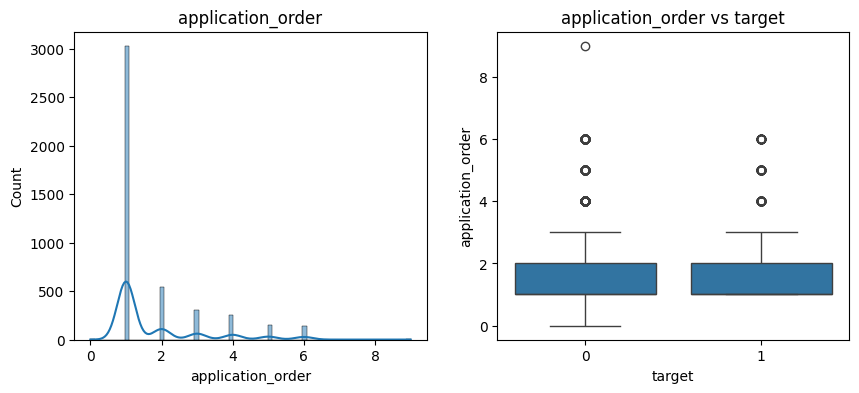

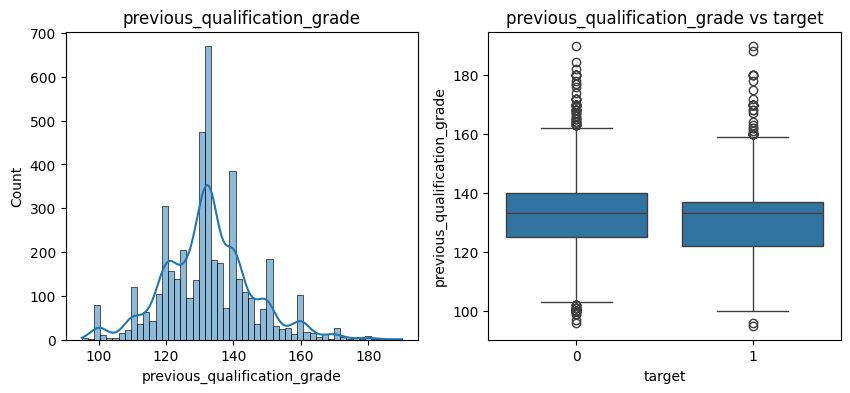

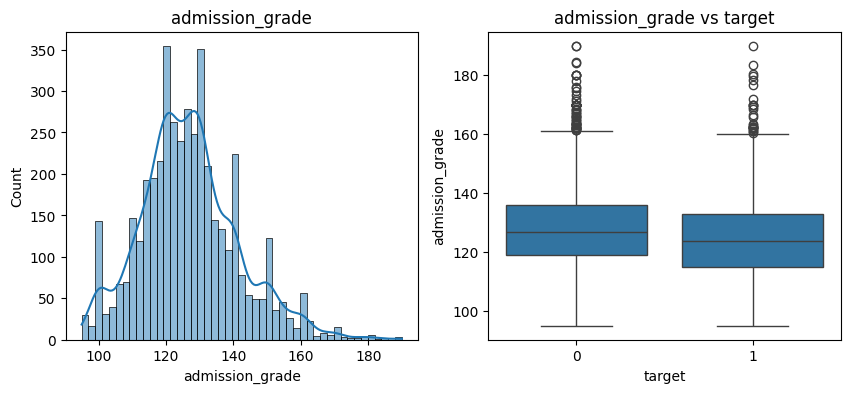

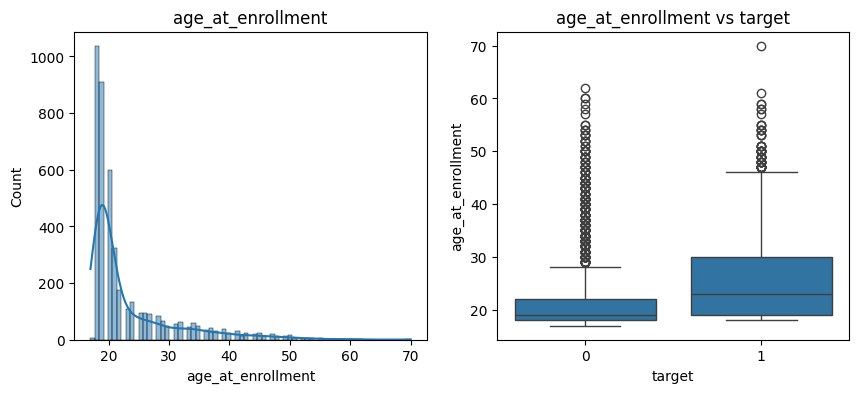

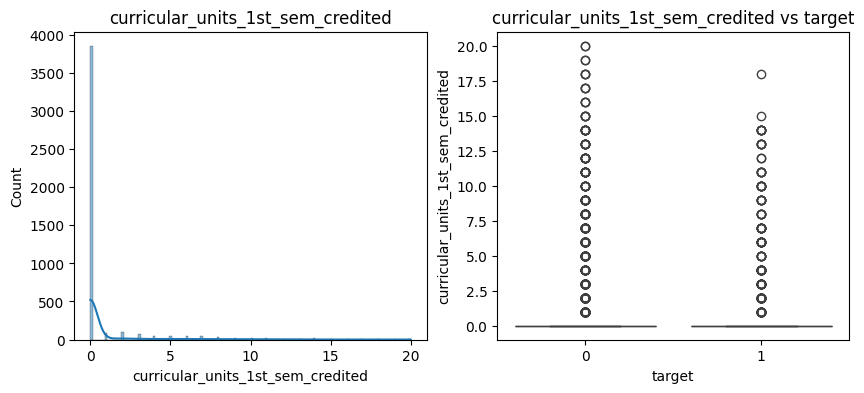

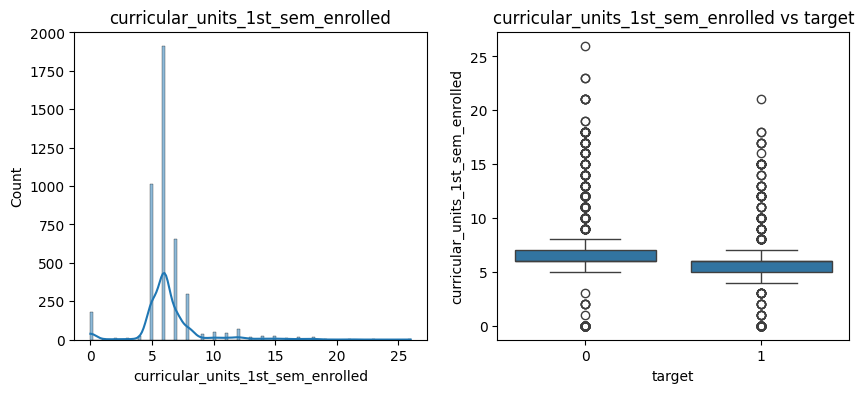

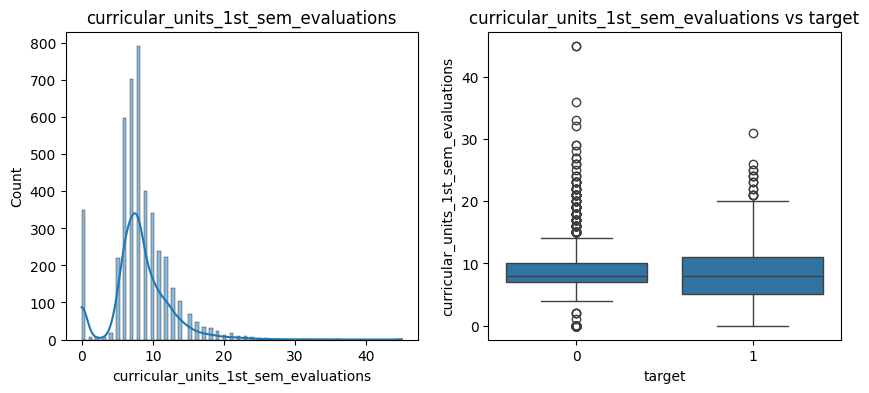

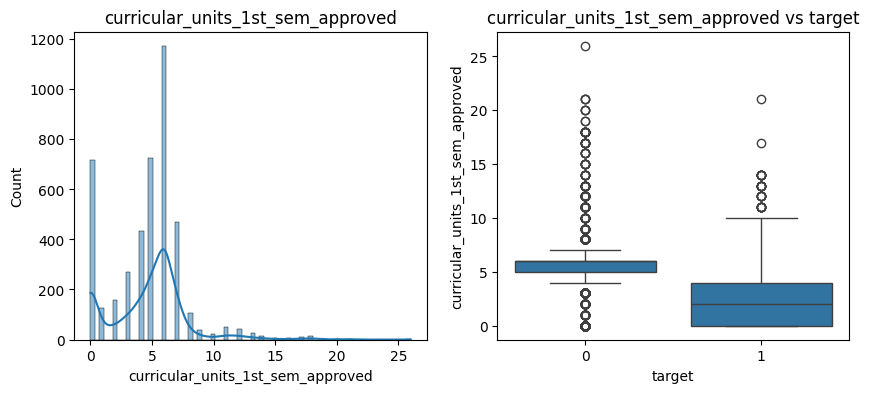

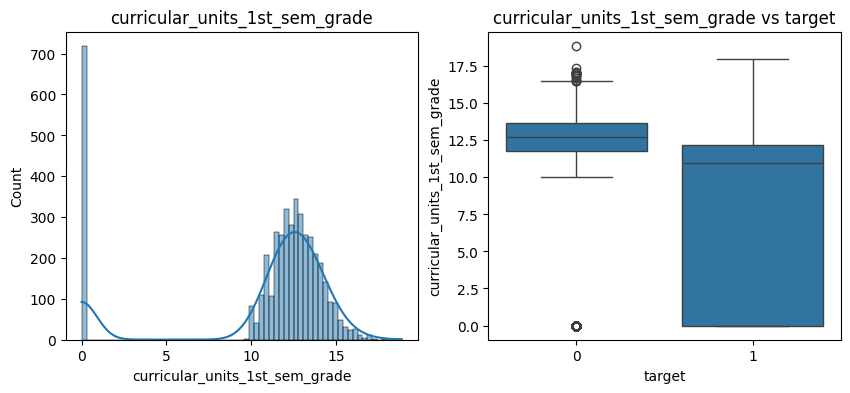

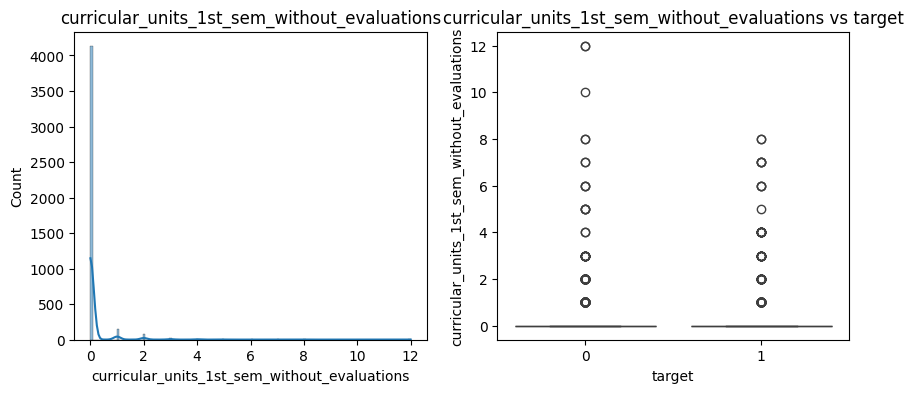

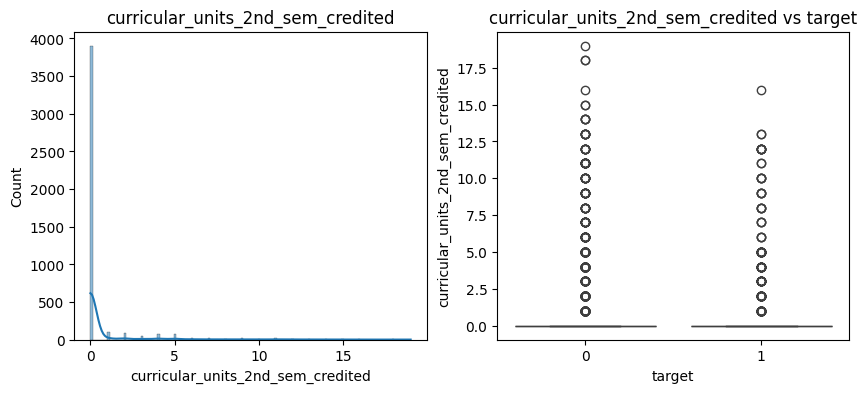

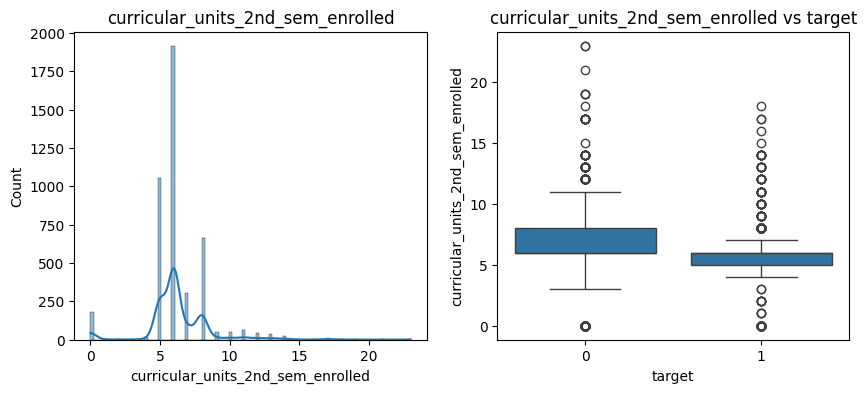

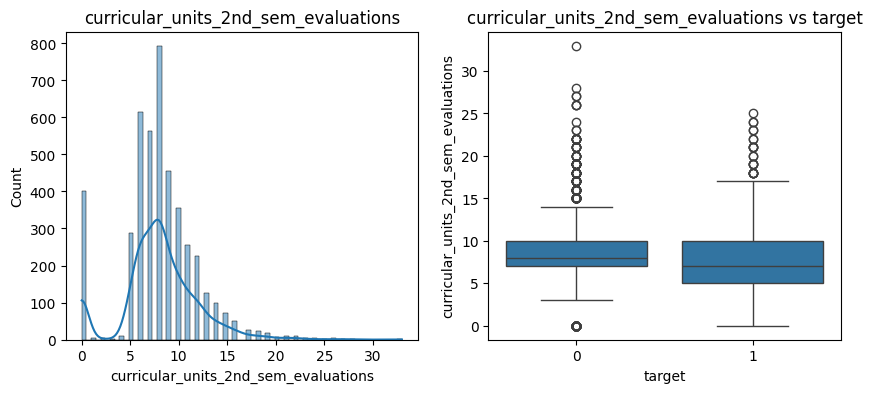

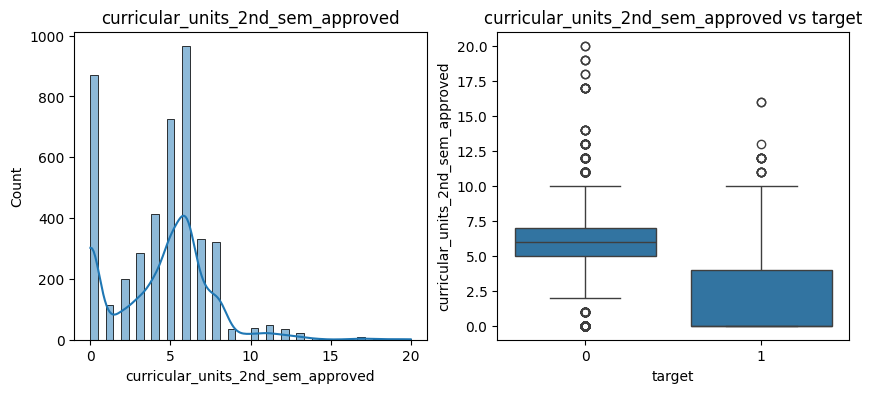

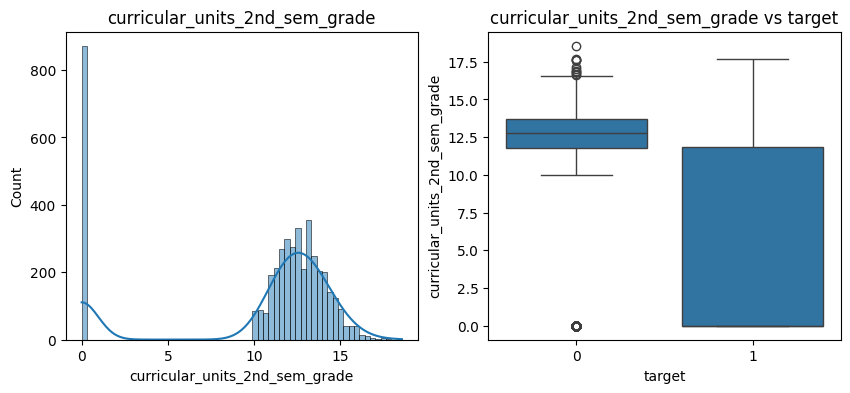

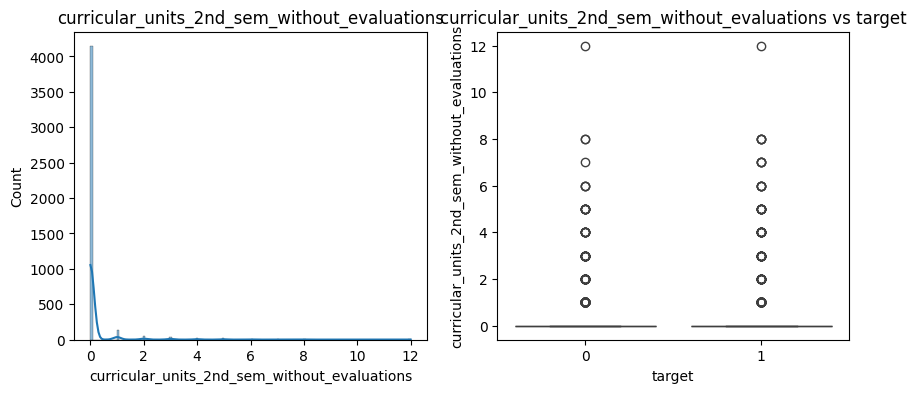

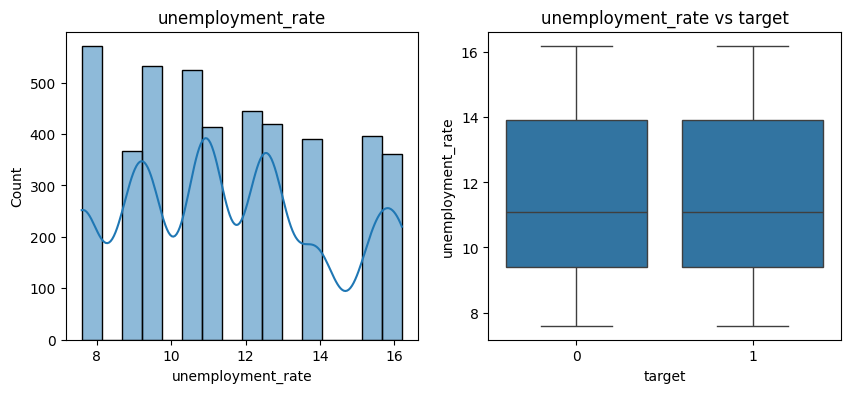

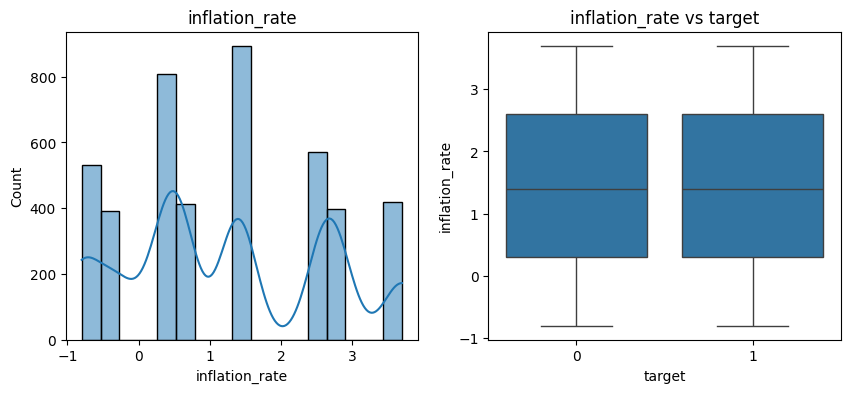

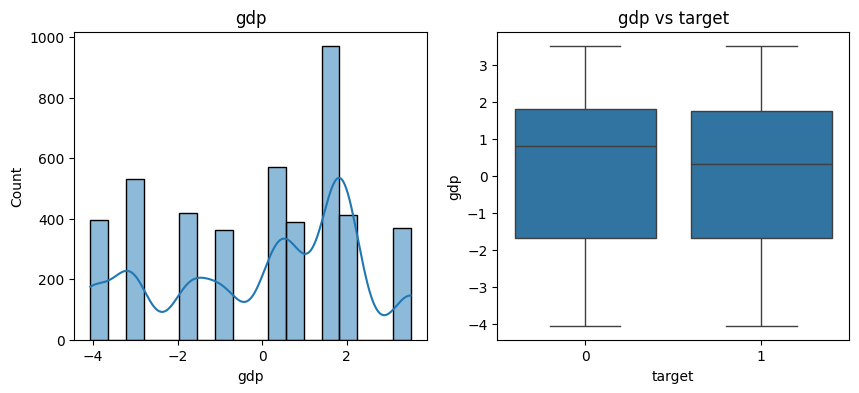

In [66]:
num = numerical_features

# histogramas y boxplots
for col in num:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(col)
    plt.subplot(1,2,2)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f"{col} vs target")
    plt.show()

In [ ]:
Correlaciones
Observa correlaciones fuertes con target. Para variables categóricas puedes codificar temporalmente con LabelEncoder para ver spearman, pero preferible usar tests anteriores (chi2, rates, mutual info).

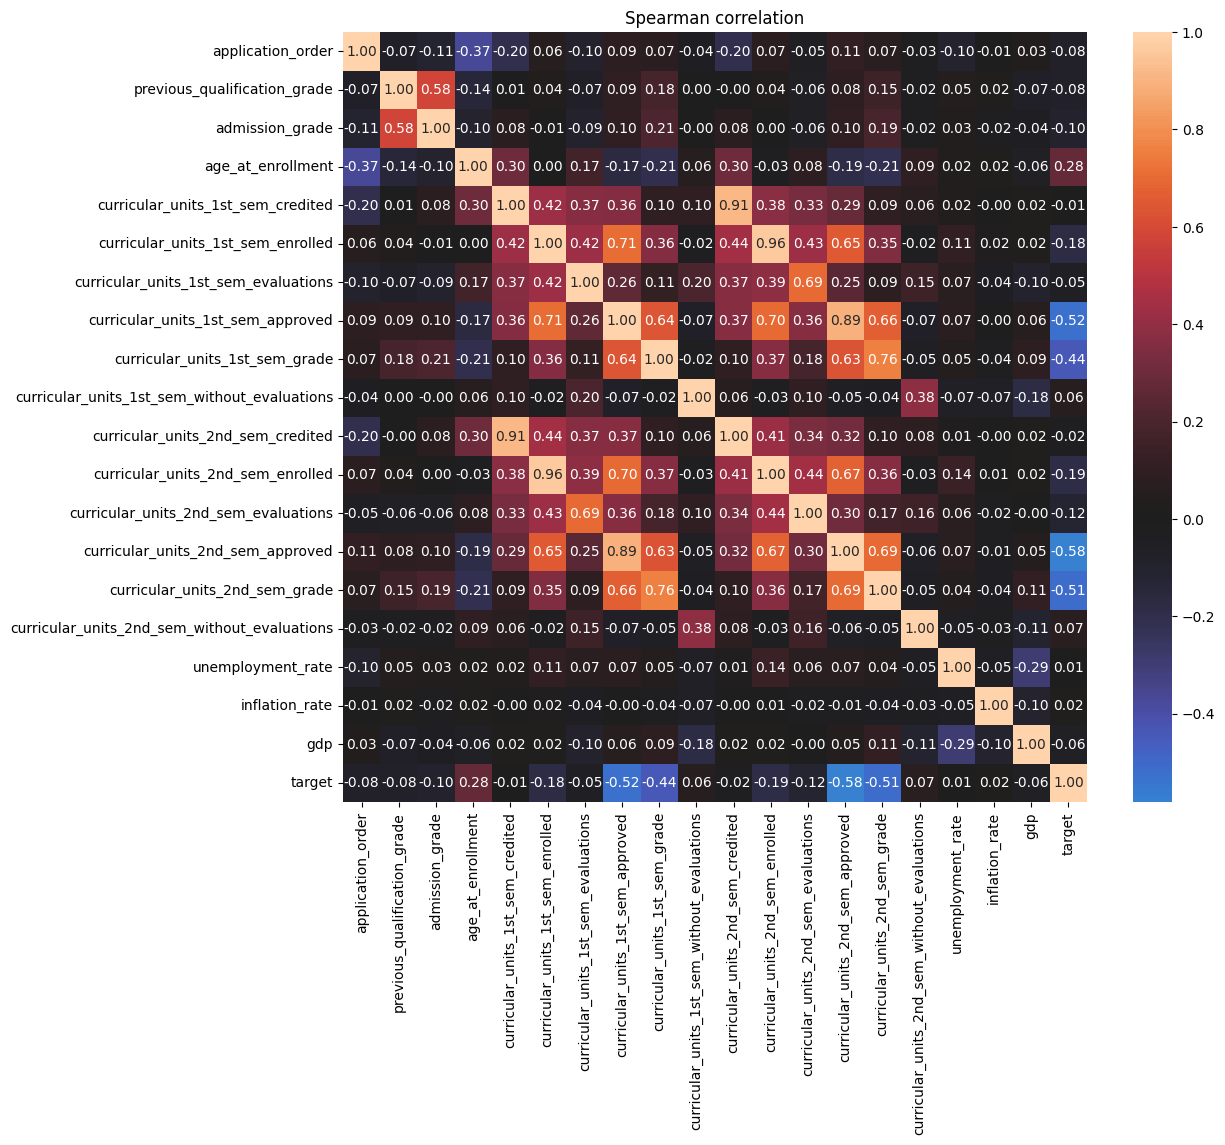

In [67]:
corr_num = df[numerical_features + ['target']].corr(method='spearman')
plt.figure(figsize=(12,10))
sns.heatmap(corr_num, annot=True, fmt=".2f", center=0)
plt.title("Spearman correlation")
plt.show()


# 2) Métodos para decidir qué variables usar (explicados y con código)

## A — Métodos de filtro (rápidos, independientes del modelo)

Univariate statistical tests: Chi² para categóricas, ANOVA / U-test para numéricas.

Mutual Information (MI) para variables mixtas — captura relación no lineal.

## Mutual information (recomendado para clasificación binaria)

In [69]:
from sklearn.feature_selection import mutual_info_classif

# Prepara X (codifica categóricas como números temporales)
X = df[binary_features + numerical_features + categotical_features].copy()
# simple encoding for MI (LabelEncoder for categoricals)
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_enc = X.copy()
X_enc[categotical_features+binary_features] = enc.fit_transform(X_enc[categotical_features+binary_features].fillna("NA"))

mi = mutual_info_classif(X_enc.fillna(0), df.target, discrete_features=[i for i, col in enumerate(X_enc.columns) if col in (binary_features + categotical_features)])
mi_series = pd.Series(mi, index=X_enc.columns).sort_values(ascending=False)
mi_series.head(30)


curricular_units_2nd_sem_approved               0.215707
curricular_units_2nd_sem_grade                  0.193554
curricular_units_1st_sem_approved               0.173422
curricular_units_1st_sem_grade                  0.142777
tuition_fees_up_to_date                         0.087932
curricular_units_2nd_sem_evaluations            0.075991
curricular_units_1st_sem_evaluations            0.061706
age_at_enrollment                               0.055348
application_mode                                0.044376
course                                          0.034555
scholarship_holder                              0.034052
admission_grade                                 0.031555
previous_qualification_grade                    0.027183
debtor                                          0.024393
mother_s_occupation                             0.023719
previous_qualification                          0.021745
curricular_units_2nd_sem_enrolled               0.021697
curricular_units_1st_sem_enroll

## B — Embedded methods (usando modelos)
* L1-penalized LogisticRegression (selecciona variables con coef != 0)
* RandomForest / XGBoost feature_importances_ (importante pero cuidado con cardinalidad)

### L1 logistic

In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# codifica categóricas con Ordinal o OneHot antes de L1
# ejemplo con DictVectorizer para categorical one-hot:
from sklearn.feature_extraction import DictVectorizer
dicts = df.drop(columns='target').to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_dv = dv.fit_transform(dicts)
y = df.target.values

clf = LogisticRegression(penalty='l1', solver='saga', C=1.0, max_iter=5000)
clf.fit(X_dv, y)
coef = pd.Series(clf.coef_[0], index=dv.get_feature_names_out())
selected = coef[coef != 0].sort_values(key=abs, ascending=False)
selected.head(50)


tuition_fees_up_to_date=yes                                                             -1.226038
tuition_fees_up_to_date=no                                                               1.124557
course=basic_education                                                                   0.883060
curricular_units_2nd_sem_approved                                                       -0.617041
course=equinculture                                                                      0.576188
mother_s_occupation=student                                                              0.525945
course=social_service                                                                   -0.515162
mother_s_qualification=unknown                                                           0.506934
curricular_units_2nd_sem_enrolled                                                        0.483945
father_s_occupation=farmers_and_skilled_workers_in_agriculture_fisheries_and_forestry   -0.473731
course=social_servic

### Random Forest importance

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_dv, y)
imp = pd.Series(rf.feature_importances_, index=dv.get_feature_names_out()).sort_values(ascending=False)
imp.head(40)


curricular_units_2nd_sem_approved                                               0.106081
curricular_units_2nd_sem_grade                                                  0.093641
curricular_units_1st_sem_approved                                               0.080739
curricular_units_1st_sem_grade                                                  0.059774
tuition_fees_up_to_date=yes                                                     0.040389
curricular_units_2nd_sem_evaluations                                            0.036305
tuition_fees_up_to_date=no                                                      0.036133
age_at_enrollment                                                               0.035660
curricular_units_1st_sem_evaluations                                            0.031105
admission_grade                                                                 0.029584
previous_qualification_grade                                                    0.027175
curricular_units_1st_

### Permutation importance

In [72]:
from sklearn.inspection import permutation_importance
res = permutation_importance(rf, X_dv, y, n_repeats=10, random_state=42, n_jobs=-1)
perm = pd.Series(res.importances_mean, index=dv.get_feature_names_out()).sort_values(ascending=False)
perm.head(40)


curricular_units_2nd_sem_approved                                              0.012952
curricular_units_1st_sem_approved                                              0.010940
age_at_enrollment                                                              0.009878
curricular_units_2nd_sem_evaluations                                           0.006216
scholarship_holder=yes                                                         0.006058
curricular_units_1st_sem_grade                                                 0.005583
curricular_units_2nd_sem_grade                                                 0.004792
scholarship_holder=no                                                          0.004272
previous_qualification_grade                                                   0.004024
curricular_units_1st_sem_evaluations                                           0.003639
gender=female                                                                  0.003617
course=basic_education          

## 4) ¿Risk ratio, Mutual Information o Correlation? — cuándo usar cada uno

* Risk Ratio / Odds Ratio: perfectos para variables binarias (interpretables y útiles en contexto médico/educativo). Útiles en EDA para priorizar variables.
* Mutual Information: muy recomendable para selección inicial porque detecta relaciones no lineales y funciona con variables categóricas y continuas. Útil como filtro rápido.
* Correlación (Pearson/Spearman): útil para numéricas. Spearman si hay no linealidad o outliers. Correlation NO detecta relaciones complejas no monótonas y NO sirve bien para categóricas.
* Chi² / ANOVA: pruebas clásicas para significancia univariante en categóricas (chi²) o numéricas (ANOVA), complementan la MI.
* Embedded & permutat ion importance / SHAP: ideales para la selección final y explicación.

Mi consejo práctico: empieza con MI + RR (para binarias) + chi² (para categóricas) para filtrar; luego aplica L1 logistic + permutation importance; finaliza con RFECV si necesitas reducir más.

? admission_grade
age_at_enrollment


Vemos que las dos tienen entre si una correlacion de 0.64 lo que podria decir que son duplicadas y podemso coger solo una?
curricular_units_1st_sem_approved
curricular_units_1st_sem_grade


Vemos que las dos tienen entre si una correlacion de 0.69 lo que podria decir que son duplicadas y podemso coger solo una?
curricular_units_2nd_sem_approved
curricular_units_2nd_sem_grade

Ademas curricular_units_1st_sem_approved y curricular_units_2nd_sem_approved tienen una correlacion del 90%
y curricular_units_1st_sem_grade con curricular_units_2nd_sem_grade del 84% por lo que basta con coger las del segundo semenstre que tienen mayor correlacion con target

De esta manera se cogeran de las numericas:
curricular_units_2nd_sem_approved
curricular_units_2nd_sem_grade
age_at_enrollment

De las categoricas:
application_mode
course
previous_qualification
mother_s_occupation

de las binarias:
tuition_fees_up_to_date
scholarship_holder
debtor
gender

Con esto generaos nuestro diccionario

In [127]:
# Splitting data
ramdom_state = 1

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=ramdom_state)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=ramdom_state)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

del df_train['target']
del df_val['target']
del df_test['target']

In [128]:
df_train

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nacionality,mother_s_qualification,father_s_qualification,...,curricular_units_1st_sem_without_evaluations,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp
0,single,2nd_phase_general_contingent,2,social_service_evening_attendance,evening,secondary_education,134.0,portuguese,secondary_education_12th_year_of_schooling_or_eq,basic_education_3rd_cycle_9th_10th_11th_year_o...,...,0,0,6,6,6,12.166667,0,7.6,2.6,0.32
1,single,over_23_years_old,1,veterinary_nursing,daytime,secondary_education,110.0,portuguese,secondary_education_12th_year_of_schooling_or_eq,secondary_education_12th_year_of_schooling_or_eq,...,0,0,6,7,6,16.666667,0,13.9,-0.3,0.79
2,single,1st_phase_general_contingent,2,journalism_and_communication,daytime,secondary_education,148.0,portuguese,basic_education_3rd_cycle_9th_10th_11th_year_o...,secondary_education_12th_year_of_schooling_or_eq,...,0,0,6,6,6,14.666667,0,16.2,0.3,-0.92
3,single,over_23_years_old,1,nursing,daytime,secondary_education,120.0,portuguese,basic_education_1st_cycle_4th_5th_year_or_equiv,basic_education_1st_cycle_4th_5th_year_or_equiv,...,0,0,7,16,4,12.600000,0,16.2,0.3,-0.92
4,married,over_23_years_old,1,management_evening_attendance,evening,secondary_education,160.0,portuguese,unknown,unknown,...,0,0,5,8,4,12.500000,1,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,single,1st_phase_general_contingent,1,nursing,daytime,secondary_education,147.0,portuguese,higher_education_degree,secondary_education_12th_year_of_schooling_or_eq,...,0,0,8,8,8,14.718750,0,11.1,0.6,2.02
2650,single,2nd_phase_general_contingent,4,social_service,daytime,secondary_education,129.0,portuguese,basic_education_3rd_cycle_9th_10th_11th_year_o...,basic_education_3rd_cycle_9th_10th_11th_year_o...,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
2651,single,2nd_phase_general_contingent,1,advertising_and_marketing_management,daytime,secondary_education,115.0,portuguese,secondary_education_12th_year_of_schooling_or_eq,secondary_education_12th_year_of_schooling_or_eq,...,0,0,6,9,5,14.600000,0,12.4,0.5,1.79
2652,single,2nd_phase_general_contingent,1,social_service,daytime,secondary_education,132.0,portuguese,basic_education_1st_cycle_4th_5th_year_or_equiv,basic_education_2nd_cycle_6th_7th_8th_year_or_...,...,0,0,6,10,6,11.714286,0,15.5,2.8,-4.06


# LogisticRegression

In [80]:

numerical_final = ['curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade', 'age_at_enrollment']

categorical_final = [
    'application_mode',
    'course',
    'previous_qualification',
    'mother_s_occupation',
    'tuition_fees_up_to_date',
    'scholarship_holder',
    'debtor',
    'gender',
]


In [81]:
from sklearn.metrics import roc_auc_score

In [82]:
auc_scores = {}

for col in numerical_features:
    auc = roc_auc_score(y_train, df_train[col])
    
    # Ifa AUC, 0.5, invert the variable
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[col])
    
    auc_scores[col] = auc

# Show results
for col, auc in auc_scores.items():
    print(f"{col}: AUC = {auc:.4f}")

application_order: AUC = 0.5407
previous_qualification_grade: AUC = 0.5560
admission_grade: AUC = 0.5628
age_at_enrollment: AUC = 0.6751
curricular_units_1st_sem_credited: AUC = 0.5003
curricular_units_1st_sem_enrolled: AUC = 0.6003
curricular_units_1st_sem_evaluations: AUC = 0.5301
curricular_units_1st_sem_approved: AUC = 0.8123
curricular_units_1st_sem_grade: AUC = 0.7783
curricular_units_1st_sem_without_evaluations: AUC = 0.5173
curricular_units_2nd_sem_credited: AUC = 0.5010
curricular_units_2nd_sem_enrolled: AUC = 0.6056
curricular_units_2nd_sem_evaluations: AUC = 0.5721
curricular_units_2nd_sem_approved: AUC = 0.8480
curricular_units_2nd_sem_grade: AUC = 0.8118
curricular_units_2nd_sem_without_evaluations: AUC = 0.5200
unemployment_rate: AUC = 0.5110
inflation_rate: AUC = 0.5106
gdp: AUC = 0.5320


Esta comprobacion nos confirma lo que hemos calculado anteriormente

Without Scalling numerical values

In [88]:
# Train function
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_final + numerical_final].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C= C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [89]:
# calculate predictions
def predict(df, dv, model):
    dicts = df[categorical_final + numerical_final].to_dict(orient='records')

    X = dv.transform(dicts)    
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [90]:
dv, model = train(df_train, y_train, C=1.0)
y_pred = predict(df_val, dv, model)
# Calculate AUC
auc = roc_auc_score(y_val, y_pred)
round(auc, 3)

np.float64(0.912)

Scalling numerical values

In [93]:
from sklearn.preprocessing import StandardScaler

# Train function
def train_scalling(df_train, y_train, C=1.0):
    dicts = df_train[categorical_final + numerical_final].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    # Scaller
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    model = LogisticRegression(solver='liblinear', C= C, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    return dv, scaler, model

# calculate predictions
def predict_scalling(df, dv, scaler, model):
    dicts = df[categorical_final + numerical_final].to_dict(orient='records')

    X = dv.transform(dicts)
    X_scaled = scaler.transform(X)
    
    y_pred = model.predict_proba(X_scaled)[:, 1]

    return y_pred

In [94]:
dv_scalling, scaler, model_scalling = train_scalling(df_train, y_train, C=1.0)
y_pred_scalling = predict_scalling(df_val, dv_scalling, scaler, model_scalling)

# Calculate AUC
auc_scalling = roc_auc_score(y_val, y_pred_scalling)
round(auc_scalling, 3)

np.float64(0.908)

In [95]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

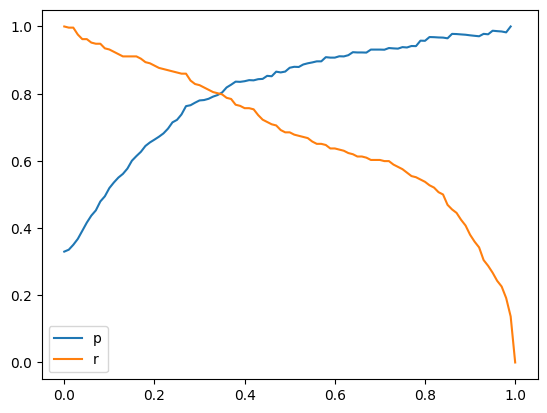

In [97]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

# p = tp / (tp + fp)
# r = tp / (tp + fn)

# df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
# df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

plt.plot(df_scores.threshold, df_scores['p'], label='p')
plt.plot(df_scores.threshold, df_scores['r'], label='r')
plt.legend()

In [98]:
# Min intersection
df_scores['p_r_intersect'] = abs(df_scores['p'] - df_scores['r'])
min_row = df_scores.loc[df_scores['p_r_intersect'].idxmin()]

print(min_row)

threshold          0.340000
tp               234.000000
fp                60.000000
fn                58.000000
tn               533.000000
p                  0.795918
r                  0.801370
p_r_intersect      0.005451
Name: 34, dtype: float64


Without Scalling numerical values

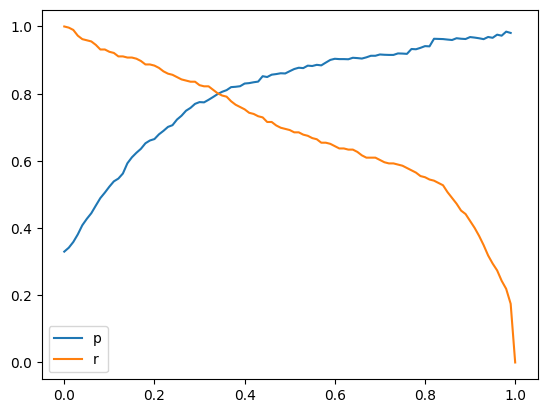

In [99]:
scores_scalling = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred_scalling >= t)
    predict_negative = (y_pred_scalling < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores_scalling.append((t, tp, fp, fn, tn))

columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores_scalling = pd.DataFrame(scores_scalling, columns=columns)

df_scores_scalling['p'] = df_scores_scalling.tp / (df_scores_scalling.tp + df_scores_scalling.fp)
df_scores_scalling['r'] = df_scores_scalling.tp / (df_scores_scalling.tp + df_scores_scalling.fn)

plt.plot(df_scores_scalling.threshold, df_scores_scalling['p'], label='p')
plt.plot(df_scores_scalling.threshold, df_scores_scalling['r'], label='r')
plt.legend()


In [100]:
# Min intersection
df_scores_scalling['p_r_intersect'] = abs(df_scores_scalling['p'] - df_scores_scalling['r'])
min_row = df_scores_scalling.loc[df_scores_scalling['p_r_intersect'].idxmin()]

print(min_row)

threshold          0.340000
tp               234.000000
fp                59.000000
fn                58.000000
tn               534.000000
p                  0.798635
r                  0.801370
p_r_intersect      0.002735
Name: 34, dtype: float64


Cross-Validation

In [101]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_final + numerical_final].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [105]:
!pip install tqdm
from tqdm.auto import tqdm
from sklearn.model_selection import KFold


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [108]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.target.values
        y_val = df_val.target.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.875 +- 0.017
C=0.01 0.892 +- 0.014
C=0.1 0.903 +- 0.011
C=0.5 0.906 +- 0.010
C=1 0.907 +- 0.009
C=5 0.907 +- 0.008
C=10 0.908 +- 0.008


In [109]:
scores

[np.float64(0.9111703883451838),
 np.float64(0.8974346203998841),
 np.float64(0.9021341769151525),
 np.float64(0.905856684337697),
 np.float64(0.9217891695653001)]

In [111]:
dv, model = train(df_full_train, df_full_train.target.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

np.float64(0.913839344379801)

Decision tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [130]:
train_dicts = df_train[categorical_final + numerical_final].fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

val_dicts = df_val[categorical_final + numerical_final].fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [131]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.802
   2 -> 0.849
   3 -> 0.881
   4 -> 0.887
   5 -> 0.881
   6 -> 0.878
  10 -> 0.841
  15 -> 0.764
  20 -> 0.778
None -> 0.781


In [138]:
scores = []

for depth in [3, 4, 5]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [139]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             3      4      5
min_samples_leaf                     
1                 0.881  0.887  0.882
5                 0.881  0.887  0.884
10                0.881  0.887  0.887
15                0.881  0.889  0.889
20                0.880  0.893  0.889
100               0.867  0.879  0.886
200               0.873  0.874  0.876
500               0.833  0.833  0.833

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

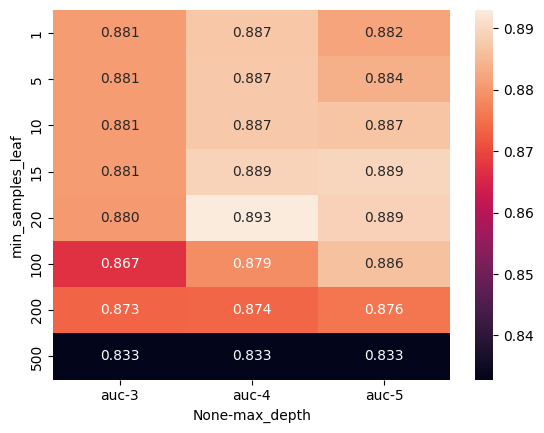

In [140]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [142]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)
dt.fit(X_train, y_train)

print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- curricular_units_2nd_sem_approved <= 3.50
|   |--- tuition_fees_up_to_date=yes <= 0.50
|   |   |--- mother_s_occupation=unskilled_workers <= 0.50
|   |   |   |--- class: 1
|   |   |--- mother_s_occupation=unskilled_workers >  0.50
|   |   |   |--- curricular_units_2nd_sem_approved <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- curricular_units_2nd_sem_approved >  1.50
|   |   |   |   |--- class: 1
|   |--- tuition_fees_up_to_date=yes >  0.50
|   |   |--- curricular_units_2nd_sem_approved <= 1.50
|   |   |   |--- course=animation_and_multimedia_design <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- course=animation_and_multimedia_design >  0.50
|   |   |   |   |--- class: 0
|   |   |--- curricular_units_2nd_sem_approved >  1.50
|   |   |   |--- age_at_enrollment <= 22.50
|   |   |   |   |--- class: 0
|   |   |   |--- age_at_enrollment >  22.50
|   |   |   |   |--- class: 1
|--- curricular_units_2nd_sem_approved >  3.50
|   |--- tuition_fees_up_to_date=yes <= 0.50
|  

In [ ]:
Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [143]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [144]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])


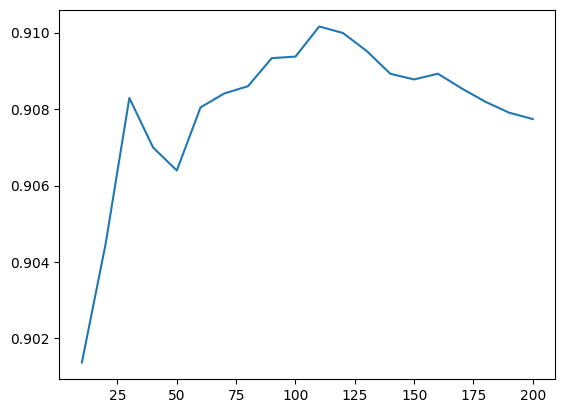

In [145]:
plt.plot(df_scores.n_estimators, df_scores.auc)


In [146]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

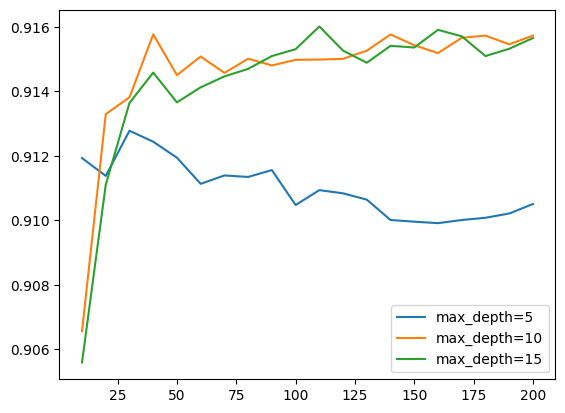

In [147]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [148]:
max_depth = 10

In [149]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

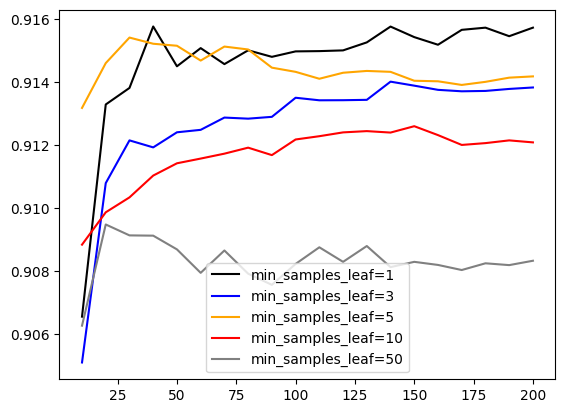

In [150]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [151]:
min_samples_leaf = 1

rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=1)

In [156]:
importances = rf.feature_importances_
feature_names = dv.get_feature_names_out()

In [158]:
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importance_df.sort_values(by='importance', ascending=False)

,feature,importance
35,curricular_units_2nd_sem_approved,2.332433e-01
36,curricular_units_2nd_sem_grade,2.328647e-01
89,tuition_fees_up_to_date=no,8.197842e-02
90,tuition_fees_up_to_date=yes,8.192170e-02
0,age_at_enrollment,6.238032e-02
...,...,...
62,mother_s_occupation=specialists_in_information...,3.042624e-05
80,previous_qualification=higher_education_doctorate,2.281911e-05
72,previous_qualification=11th_year_of_schooling_...,1.987809e-05
8,application_mode=change_of_institution_course_...,4.486834e-06


Gradient boosting and XGBoost

In [159]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [160]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [161]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.9090242324840029)

In [162]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [163]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [164]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [165]:
df_score = parse_xgb_output(output)

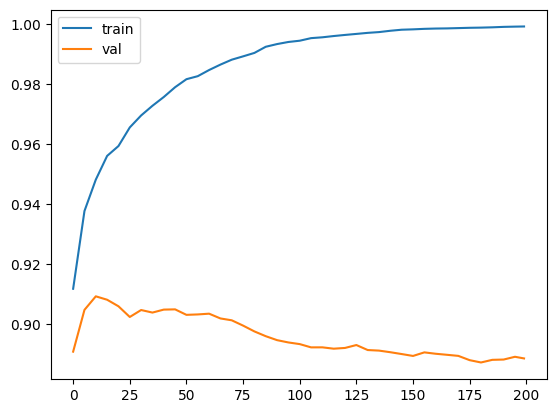

In [166]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

Tuning the following parameters:

* eta
* max_depth
* min_child_weight

In [167]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [168]:
scores = {}

In [169]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'